# Getting Started with Inmetpy

In [5]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

In [6]:
import pandas as pd 
import plotly.express as px 


from inmetpy.inmet_stations import InmetStation

In [7]:
inmet = InmetStation()

stations = inmet.stations

In [8]:
stations.LATITUDE = stations.LATITUDE.astype(float)
stations.LONGITUDE = stations.LONGITUDE.astype(float)

In [63]:
fig = px.scatter_mapbox(stations, lat="LATITUDE", lon="LONGITUDE", hover_name="STATION_NAME", hover_data=["TP_STATION", "CD_SITUATION"],
                        color = "CD_SITUATION", 
                        zoom=3, height=300, 
                        color_discrete_map= {'Down': 'red',
                                             'Operative': 'green'})
                                                                  
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(height=800, width=600)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.79
))
fig.show()

In [51]:
# Mapa com a coloração da temperatura
all_stations_data = inmet.get_all_stations()

In [54]:
all_stations_data.LAT

0        -15.78944444
1        -15.78944444
2        -15.78944444
3        -15.78944444
4        -15.78944444
             ...     
14396    -19.97999999
14397    -19.97999999
14398    -19.97999999
14399    -19.97999999
14400    -19.97999999
Name: LAT, Length: 14401, dtype: object

In [55]:
all_stations_data.LAT = all_stations_data.LAT.astype(float)
all_stations_data.LONG = all_stations_data.LONG.astype(float)

In [56]:
all_stations_data.TEMP = all_stations_data.TEMP.astype(float)

In [57]:
daily_mean = all_stations_data.groupby(['STATION_NAME', 'LAT','LONG'])['TEMP'].mean().to_frame(name = 'TEMP').reset_index()

In [67]:
daily_mean.dropna(inplace=True)

In [81]:
daily_mean

9.854166666666666

In [93]:
fig = px.scatter_mapbox(daily_mean, lat="LAT", lon="LONG", color="TEMP",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=3.5,
                       mapbox_style = 'open-street-map')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(height=800, width=600)
fig.show()

In [95]:
states = ['RJ']
rj_stations = inmet.search_station_by_state(states, station_type = "A")

In [96]:
rj_stations

,CD_OSCAR,STATION_NAME,FL_CAPITAL,END_DATE_OPERATION,CD_SITUATION,TP_STATION,LATITUDE,CD_WSI,CD_DISTRICT,HEIGHT,STATE,INSTITUTE,CD_STATION,LONGITUDE,START_DATE_OPERATION
23,None,ANGRA DOS REIS,N,None,Operative,Automatic,-22.975556,0-76-0-3300100000000555,06,6,RJ,INMET,A628,-44.303333,2017-08-24T21:00:00.000-03:00
41,0-2000-0-86892,ARRAIAL DO CABO,N,None,Operative,Automatic,-22.975278,0-76-0-3300258000000108,06,5,RJ,INMET,A606,-42.021389,2006-09-21T21:00:00.000-03:00
98,0-2000-0-86854,CAMBUCI,N,None,Operative,Automatic,-21.587500,0-76-0-3300902000000025,06,46,RJ,INMET,A604,-41.958333,2002-11-19T22:00:00.000-02:00
109,0-2000-0-86855,CAMPOS DOS GOYTACAZES,N,None,Operative,Automatic,-21.714722,0-76-0-3301009000000109,06,17,RJ,INMET,A607,-41.343889,2006-09-24T21:00:00.000-03:00
110,0-2000-0-86890,CAMPOS DOS GOYTACAZES - SAO TOME,N,None,Operative,Automatic,-22.041667,0-76-0-3301009000000382,06,7,RJ,INMET,A620,-41.051667,2008-06-12T21:00:00.000-03:00
125,None,CARMO,N,None,Operative,Automatic,-21.938745,0-76-0-3301207000000583,06,293,RJ,INMET,A629,-42.600936,2018-10-10T21:00:00.000-03:00
180,0-2000-0-86877,DUQUE DE CAXIAS - XEREM,N,None,Operative,Automatic,-22.589722,0-76-0-3301702000000022,06,22,RJ,INMET,A603,-43.282222,2002-10-20T21:00:00.000-03:00
255,None,ITATIAIA - AGULHAS NEGRAS,N,None,Operative,Automatic,-22.373889,0-76-0-3302254000000557,06,2450,RJ,INMET,A635,-44.703056,2017-08-31T21:00:00.000-03:00
295,0-2000-0-86891,MACAE,N,None,Operative,Automatic,-22.376111,0-76-0-3302403000000106,06,28,RJ,INMET,A608,-41.811944,2006-09-21T21:00:00.000-03:00
338,None,NITEROI,N,None,Operative,Automatic,-22.867500,0-76-0-3303302000000580,06,6,RJ,INMET,A627,-43.101944,2018-07-12T21:00:00.000-03:00


In [115]:
stations = ['A627']
niteroi = inmet.get_data_station('2019-01-01','2020-01-01', by='day',station_id = stations)

A627
Looking for station A627...


<AxesSubplot:>

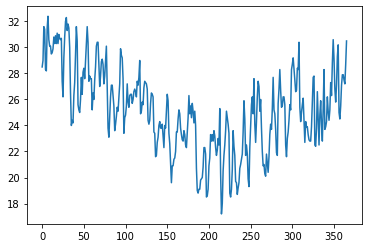

In [116]:
niteroi.TEMP_MED.plot(x='DATE')

In [117]:
niteroi.columns

Index(['index', 'DATE', 'AVG_RH', 'STATION_NAME', 'MIN_RH', 'TEMP_MED', 'RAIN',
       'LAT', 'TEMP_MIN', 'TEMP_MAX', 'ST', 'WSPD', 'STATION_ID', 'LONG'],
      dtype='object')

In [119]:
temp = px.line(x=niteroi.DATE,y=niteroi.TEMP_MED, labels = {'x':'Date', 'y':'°C'},
              markers='line+markers')
temp.show()